In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\business.retailsales.csv")

In [57]:
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [58]:
df.shape

(1775, 6)

In [59]:
df.dtypes

Product Type        object
Net Quantity         int64
Gross Sales        float64
Discounts          float64
Returns            float64
Total Net Sales    float64
dtype: object

In [60]:
df=df.dropna()

In [61]:
df.duplicated().sum()

511

In [62]:
df.select_dtypes(include='number').corr()['Total Net Sales']

Net Quantity       0.492947
Gross Sales        0.996804
Discounts         -0.838726
Returns           -0.671234
Total Net Sales    1.000000
Name: Total Net Sales, dtype: float64

In [63]:
num_cols=df.select_dtypes(include='number')
cat_cols=df.select_dtypes(include='object')

In [64]:
num_cols.isnull().sum()

Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

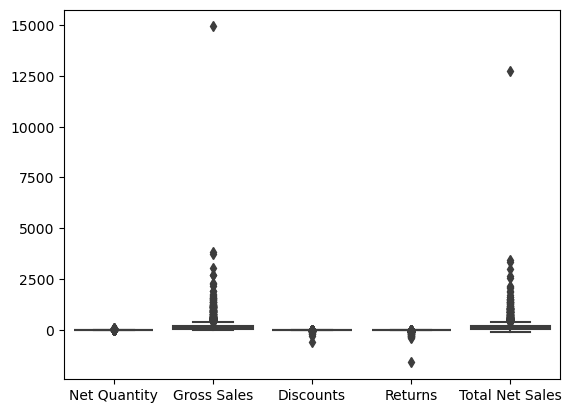

In [11]:
sns.boxplot(num_cols)
plt.show()

In [82]:
def wisker(col):
   q1=num_cols[col].quantile(0.25)
   q3=num_cols[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [83]:
for i in num_cols:
  lower,upper=wisker(i)
  num_cols[i]=np.where(num_cols[i]<lower,lower,num_cols[i])   
  num_cols[i]=np.where(num_cols[i]>upper,upper,num_cols[i])

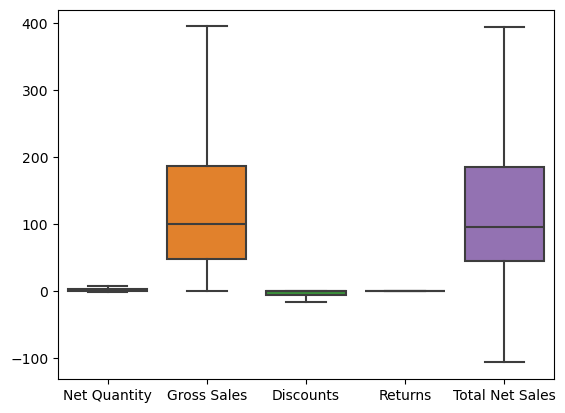

In [14]:
sns.boxplot(num_cols)
plt.show()

In [84]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(num_cols)

array([[1.        , 1.        , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ],
       ...,
       [0.10526316, 0.29329962, 0.        , 0.        , 0.21190666],
       [0.10526316, 0.04171934, 1.        , 0.        , 0.21190666],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

In [85]:
num_cols_scaled=pd.DataFrame(num_cols)

In [86]:
num_cols_scaled.head()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,8.5,395.5,-15.4,0.0,395.15
1,8.5,395.5,-15.4,0.0,395.15
2,8.5,395.5,-15.4,0.0,395.15
3,8.5,395.5,-15.4,0.0,395.15
4,8.5,395.5,-15.4,0.0,395.15


In [87]:
cat_cols.isnull().sum()

Product Type    0
dtype: int64

In [88]:
#cat_cols=cat_cols.dropna()

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
cat_cols_encoded=cat_cols.apply(le.fit_transform)

In [91]:
cat_cols_encoded.head()

,Product Type
0,1
1,2
2,2
3,2
4,1


In [92]:
num_cols_scaled = num_cols_scaled.loc[cat_cols_encoded.index]

In [93]:
df_final=pd.concat([num_cols_scaled,cat_cols_encoded],axis=1)

In [94]:
df_final.head()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Product Type
0,8.5,395.5,-15.4,0.0,395.15,1
1,8.5,395.5,-15.4,0.0,395.15,2
2,8.5,395.5,-15.4,0.0,395.15,2
3,8.5,395.5,-15.4,0.0,395.15,2
4,8.5,395.5,-15.4,0.0,395.15,1


In [95]:
x=df_final.drop('Total Net Sales',axis=1)
y=df_final['Total Net Sales']

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [97]:
x_train.shape,x_test.shape

((1236, 5), (531, 5))

In [98]:
y_train.shape,y_test.shape

((1236,), (531,))

In [99]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
from sklearn.metrics import r2_score
training_score = RF.score(x_train, y_train)*100
print(f'Training Score : {training_score}')
print("r2_score : ",r2_score(y_test,y_pred)*100)

Training Score : 99.66414441934737
r2_score :  97.71032833064415


In [81]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=3, shuffle=True, random_state=42)

scores = cross_val_score(RF, x, y, cv=kf)

print(f"Scores for each fold: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Scores for each fold: [0.98884277 0.55766485 0.98736854]
Mean cross-validation score: 0.844625386913938


In [32]:
param_grid={
    'n_estimators':[500,1000,1500,3000],
    'criterion':['squared_error'],
    'max_depth':['None',5,10,20],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4],
    'random_state':['None',21,42,50]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

y_pred = grid_search.predict(x_test)

r2_score = r2_score(y_test, y_pred)
print(f"Test Set r2_score: {r2_score}")

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


# NEW

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestRegressor
from feature_engine.outliers import Winsorizer

In [5]:
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [6]:
df.columns

Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [7]:
df.shape

(1775, 6)

In [8]:
df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [9]:
df['Returns'].value_counts()

Returns
 0.00      1676
-38.00        8
-110.00       7
-28.00        7
-56.00        6
           ... 
-38.88        1
-104.00       1
-376.00       1
-43.50        1
-106.25       1
Name: count, Length: 62, dtype: int64

In [10]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Total Net Sales']),
                                                 df['Total Net Sales'],
                                                 test_size=0.2,
                                                random_state=42)

In [11]:
X_train.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns
1040,Kitchen,7,76.5,-3.67,0.0
198,Art & Sculpture,1,350.0,0.00,0.0
15,Jewelry,33,1584.0,-67.17,0.0
265,Music,16,292.0,-12.20,0.0
817,Furniture,1,110.0,0.00,0.0


In [12]:
y_train.head()

1040      72.83
198      350.00
15      1516.83
265      279.80
817      110.00
Name: Total Net Sales, dtype: float64

In [13]:
df.columns

Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [21]:
# Label encoding
trf1 = ColumnTransformer([
    ('ohe_Ptype',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

In [22]:
X_train.columns[1:5]

Index(['Net Quantity', 'Gross Sales', 'Discounts', 'Returns'], dtype='object')

In [23]:

# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,24))
])

In [24]:
# train the model
trf3 = RandomForestRegressor()

In [26]:
# creating pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [27]:
# train
pipe.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Ptype',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 24, None))])),
                ('trf3', RandomForestRegressor())])

In [28]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_Ptype',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [0])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 24, None))]),
 'trf3': RandomForestRegressor()}

In [29]:
# Predict
y_pred = pipe.predict(X_test)

In [30]:
y_pred

array([ 862.5558,   68.    ,   77.5445,  219.67  ,  157.581 ,   71.888 ,
        115.99  ,  233.213 ,  175.    ,  203.3339,   58.436 ,   64.361 ,
         18.    ,   28.    ,   28.    ,   28.9064,  557.6726,   96.0933,
         75.98  ,   96.    ,  215.8515,   13.855 ,   17.98  ,   48.    ,
        213.5301,   47.952 ,   61.2857,  196.1912,   68.    ,   57.585 ,
        149.5429,  110.    ,  135.3157,   41.4139,  291.0432,   83.6566,
        543.0431,   38.    ,  107.3594, 1109.0505,  331.877 ,  151.5726,
        187.256 ,  129.1431,   51.849 ,  168.0306,  209.5039,  145.    ,
         58.    ,  223.5109,   50.7876,  844.4436,   66.0498,  269.7436,
        102.619 ,  419.7636,  518.9923,  100.5441,  227.7425,  157.581 ,
         40.035 ,  130.076 ,   58.    ,   77.685 ,  145.    ,   24.    ,
       1357.0312,  169.3015,   48.    ,   53.9439,  275.0929,   48.    ,
         29.3647,   68.    ,  539.9369,  143.9401,   36.    ,  116.2238,
        166.41  ,  150.5924,   42.114 ,  145.    , 

In [31]:
# Predict
y_train_pred = pipe.predict(X_train)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.9690594637933182

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9932989220210559

In [39]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [15]:
selected_columns = list(X_train.columns[1:5])